## 誤差逆伝播法の実装 回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 入力と正解
input_data = np.linspace(-np.pi , np.pi)
Y = np.sin(input_data)
n_data = len(Y)

In [3]:
# 各設定値
n_in = 1  # 入力数のニューロン数
n_mid = 3  # 中間層のニューロン数
n_out = 1  # 出力層のニューロン数

wb_width = 0.01  # 重みとバイアスの広がり具合
eta = 0.1 # 学習率
epoch = 2001   # エポック数
interval = 200  

In [4]:
# 各活性化関数
def sigmoid_func(x):
    return 1/(1 + np.exp(-x))

In [5]:
# -- 中間層 --
class Middlelayer :
    def __init__(self,n_upper,n):
        self.w = wb_width * np.random.randn(n_upper,n)  # 重み（行列）
        self.b = wb_width * np.random.randn(n)  #バイアス（ベクトル）
    
    def forward(self,x):  # 順伝播
        self.x = x
        u = np.dot(x,self.w) + self.b
        self.y = sigmoid_func(u)  # 活性化関数　シグモイド関数
    
    def backforward(self, grad_y):  # 逆伝播
        delta = grad_y * (1 - self.y) * self.y  # シグモイド関数の微分

        self.grad_w = np.dot(self.x.T , delta)
        self.grad_b = np.sum(delta , axis=0)
        self.grad_x = np.dot(delta , self.w.T)
    
    def update(self,eta):  # 重みとバイアスの更新
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
# -- 出力層 --
class OutputLayer :
    def __init__(self, n_upper , n) :   # 初期設定
        self.w = wb_width * np.random.randn(n_upper , n)
        self.b = wb_width * np.random.randn(n)
    
    def forward(self,x):  # 順伝播
        self.x = x
        u = np.dot(x,self.w) + self.b 
        self.y = u   # 恒等関数
    
    def backforward(self,t):
        delta = self.y - t

        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta,axis=0)
        self.grad_x = np.dot(delta, self.w.T)
    
    def update(self,eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

### メイン処理

In [7]:
# -- 各層の初期化
middle_layer = Middlelayer(n_in,n_mid)
output_layer = OutputLayer(n_mid, n_out)

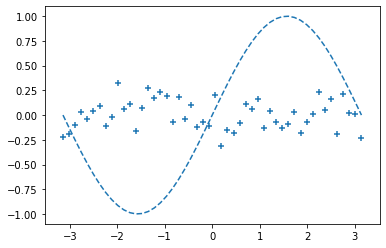

Epoch:0/2001
Error:0.010253704521460648


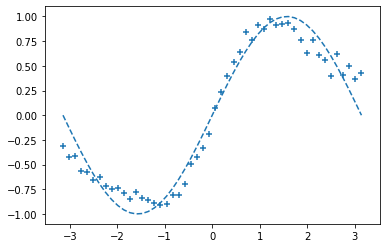

Epoch:200/2001
Error:0.0004017110004414161


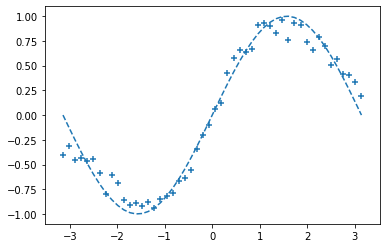

Epoch:400/2001
Error:2.8089689177371687e-05


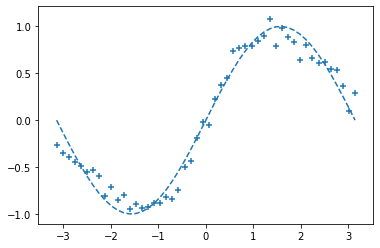

Epoch:600/2001
Error:0.0001352202212316726


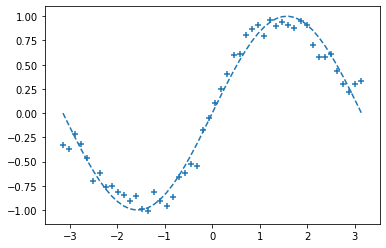

Epoch:800/2001
Error:0.00011917715686838352


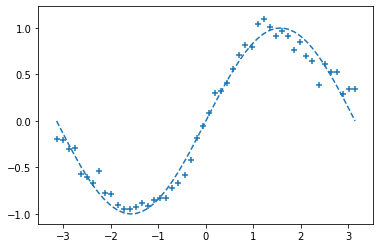

Epoch:1000/2001
Error:6.0616784014518675e-05


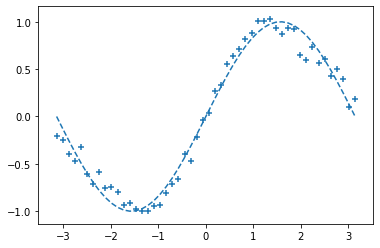

Epoch:1200/2001
Error:0.00015619929967878264


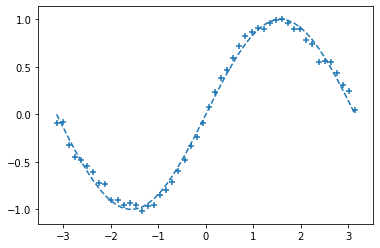

Epoch:1400/2001
Error:2.3255061492439076e-06


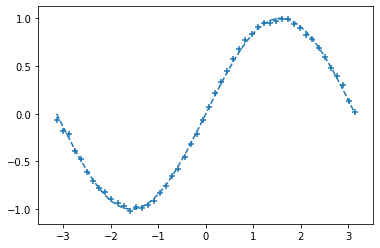

Epoch:1600/2001
Error:3.920632373045975e-06


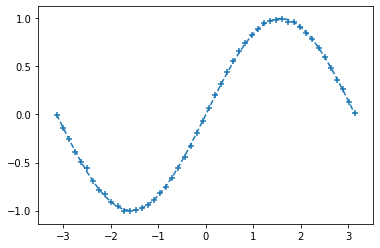

Epoch:1800/2001
Error:7.877494339534059e-07


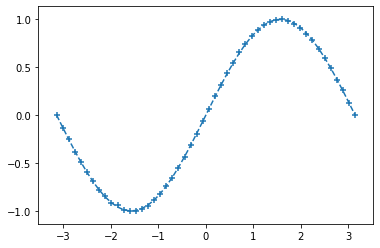

Epoch:2000/2001
Error:6.963851494441797e-07


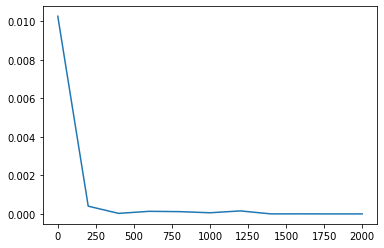

In [8]:
error_x = []
error_list = []
# -- 学習 --
for i in range(epoch):
    # インデックスシャッフル
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    # 結果表示用
    total_error = 0
    plot_x = []
    plot_y = []

    # バッチ学習
    for idx in index_random:
        x = input_data[idx : idx+1]
        t = Y[idx : idx+1]  # 正解データ

        # 順伝播
        middle_layer.forward(x.reshape(1,1))  # リストから行列に変換してセットする
        output_layer.forward(middle_layer.y)

        # 逆伝播
        output_layer.backforward(t.reshape(1,1))
        middle_layer.backforward(output_layer.grad_x)

        # 重みとバイアスの更新
        middle_layer.update(eta)
        output_layer.update(eta)

        # 学習結果出力
        if i % interval == 0 :
            y_hat = output_layer.y.reshape(-1) # 行列からベクトルへ。
            
            # 誤差の計算
            total_error = 1.0 / 2.0 * np.sum(np.square(y_hat - t))
            
            # 出力
            plot_x.append(x)
            plot_y.append(y_hat)
    
    # 100エポックごとの学習結果
    if i % interval == 0 :
        plt.plot(input_data,Y, linestyle = 'dashed')
        plt.scatter(plot_x , plot_y, marker='+')
        plt.show()

        error_x.append(i)
        error_list.append(total_error/n_data)
        
        #エポック数と誤差表示
        print("Epoch:{}/{}".format(str(i),str(epoch)))
        print("Error:{}".format(str(total_error/n_data)))

plt.plot(error_x,error_list)
plt.show()
